In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

%matplotlib inline

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/Dataset.csv")
data_dict = pd.read_csv("/content/gdrive/MyDrive/Data Dictionary.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [5]:
data_dict

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitali...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None
5,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admi...,21.5
6,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospit...,0
7,demographic,ethnicity,None,string,The common national or cultural tradition whic...,Caucasian
8,demographic,gender,None,string,The genotypical sex of the patient,F
9,demographic,height,centimetres,numeric,The height of the person on unit admission,180


In [6]:
data.shape

(91713, 186)

In [7]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   91713 non-null  int64  
 1    patient_id                     91713 non-null  int64  
 2    hospital_id                    91713 non-null  int64  
 3    hospital_death                 91713 non-null  int64  
 4    age                            87485 non-null  float64
 5    bmi                            88284 non-null  float64
 6    elective_surgery               91713 non-null  int64  
 7    ethnicity                      90318 non-null  object 
 8    gender                         91688 non-null  object 
 9    height                         90379 non-null  float64
 10   hospital_admit_source          70304 non-null  object 
 11   icu_admit_source               91601 non-null  object 
 12   icu_id                        

In [8]:
data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.0,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,23729.000000,23729.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,23936.000000,23936.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,23754.000000,23754.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,16869.000000,16869.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,16798.000000,

In [9]:
cols = ['encounter_id','patient_id','hospital_id']
data.duplicated(subset=cols).sum()

0

In [10]:
data.drop(cols,axis=1,inplace=True)

In [11]:
data.drop('readmission_status',axis=1,inplace=True)

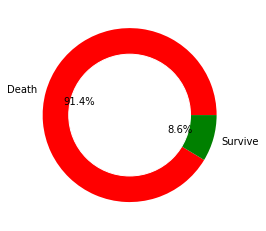

In [12]:
#Pie Chart Visualisation
death = data['hospital_death'].value_counts().to_frame('counts')
my_circle = plt.Circle((0,0),0.7,color='white')
plt.pie(death.counts,labels=['Death','Survive'],colors=['red','green'],autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

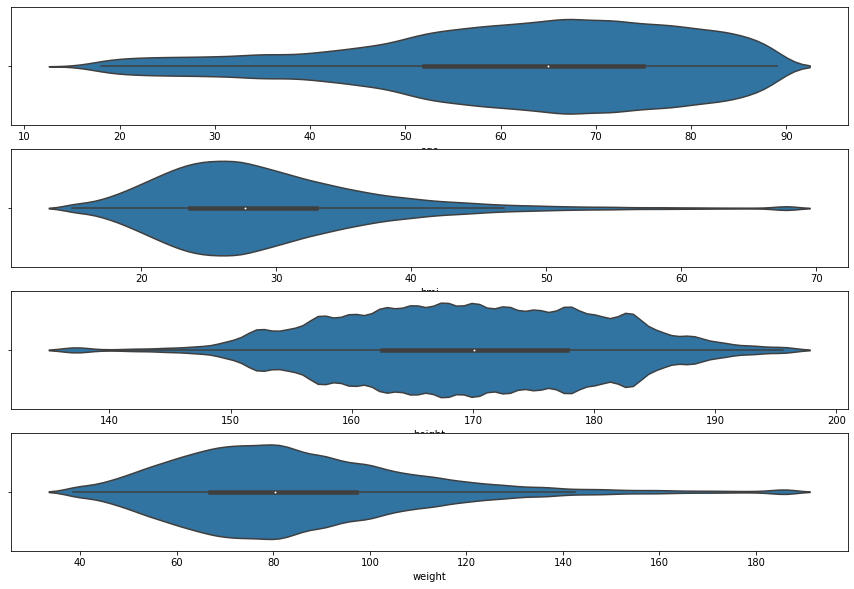

In [13]:
#Violin plot on Original attributes to visualize the spread of the data
plt.figure(figsize = (15,10))
plt.subplot(4,1,1)
sns.violinplot( x = 'age', data = data)
plt.subplot(4,1,2)
sns.violinplot( x = 'bmi', data = data)
plt.subplot(4,1,3)
sns.violinplot( x = 'height', data=data)
plt.subplot(4,1,4)
sns.violinplot( x = 'weight', data=data)
plt.show()

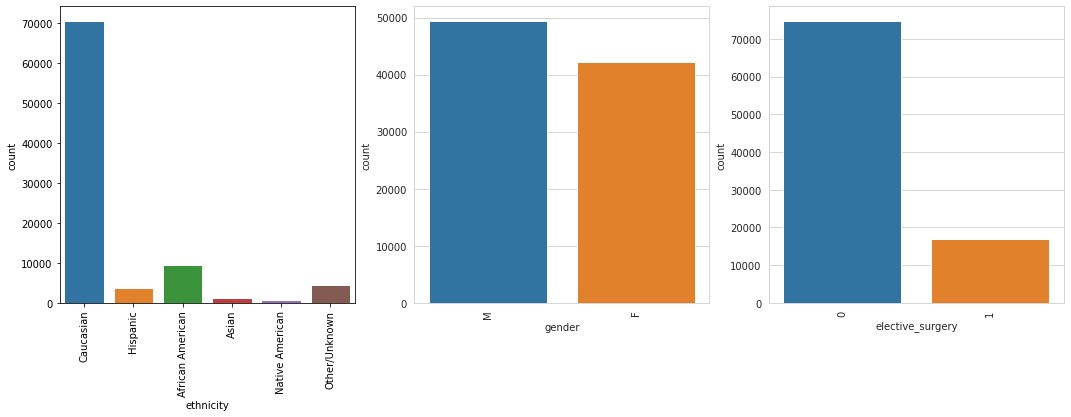

In [14]:
demo2 = ['ethnicity', 'gender', 'elective_surgery']
plt.figure(figsize=(18,12))

i=1
for col in demo2:
    plt.subplot(2,3,i)
    sns.set_style("whitegrid")
    sns.countplot(data[col])
    plt.xticks(rotation=90)
    i+=1

plt.show()   

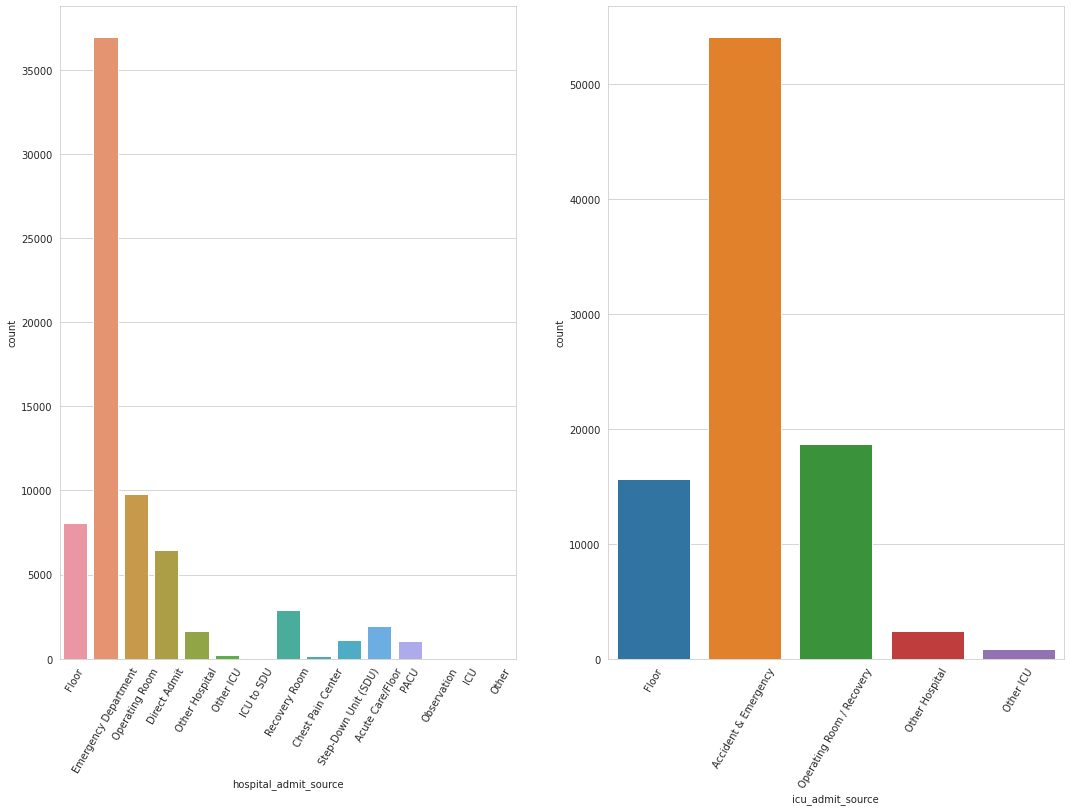

In [15]:
demo3 = ['hospital_admit_source', 'icu_admit_source']
plt.figure(figsize=(18,12))

i=1
for col in demo3:
    plt.subplot(1,2,i)
    sns.set_style("whitegrid")
    sns.countplot(data[col])
    plt.xticks(rotation=60)
    i+=1

plt.show()   

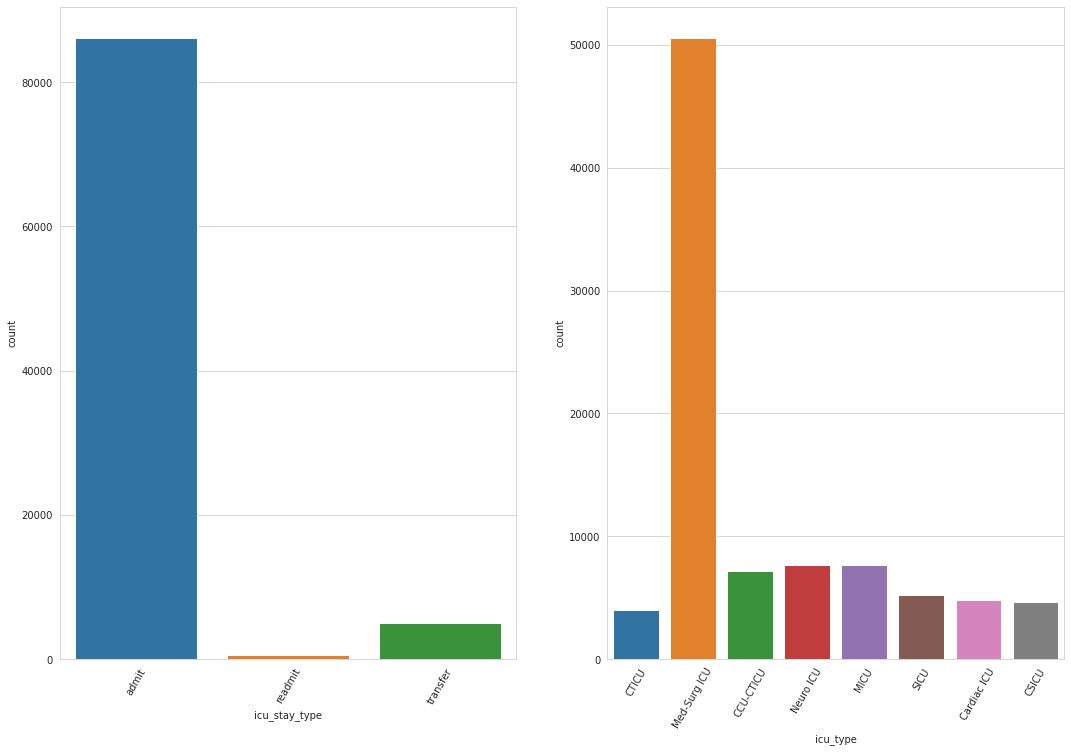

In [16]:
demo4 = ['icu_stay_type', 'icu_type']
plt.figure(figsize=(18,12))

i=1
for col in demo4:
    plt.subplot(1,2,i)
    sns.set_style("whitegrid")
    sns.countplot(data[col])
    plt.xticks(rotation=60)
    i+=1

plt.show()   

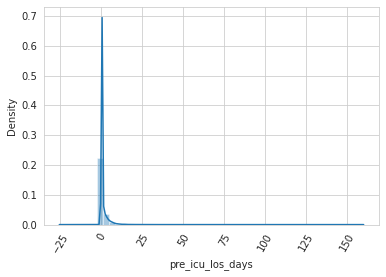

In [17]:
sns.set_style("whitegrid")
sns.distplot(data['pre_icu_los_days'])
plt.xticks(rotation=60)
plt.show()   

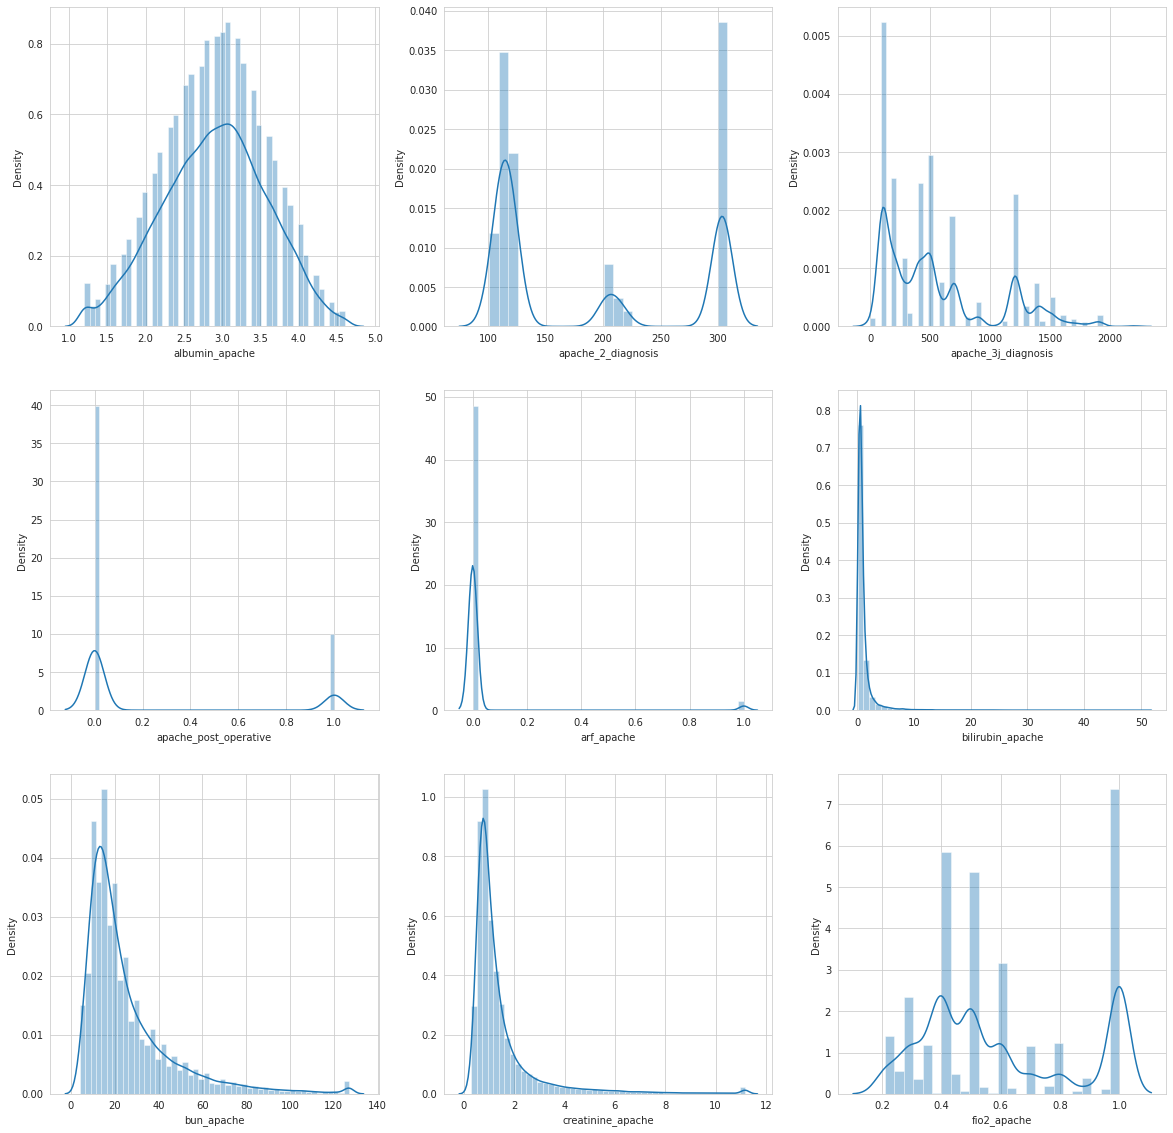

In [18]:
apache=['albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache']

#Countplot on above Columns
plt.figure(figsize=(20,20))
i=0
for col in apache:
    plt.subplot(3,3,i+1)
    sns.set_style("whitegrid")
    sns.distplot(data[col])
    i+=1
    
plt.show()  

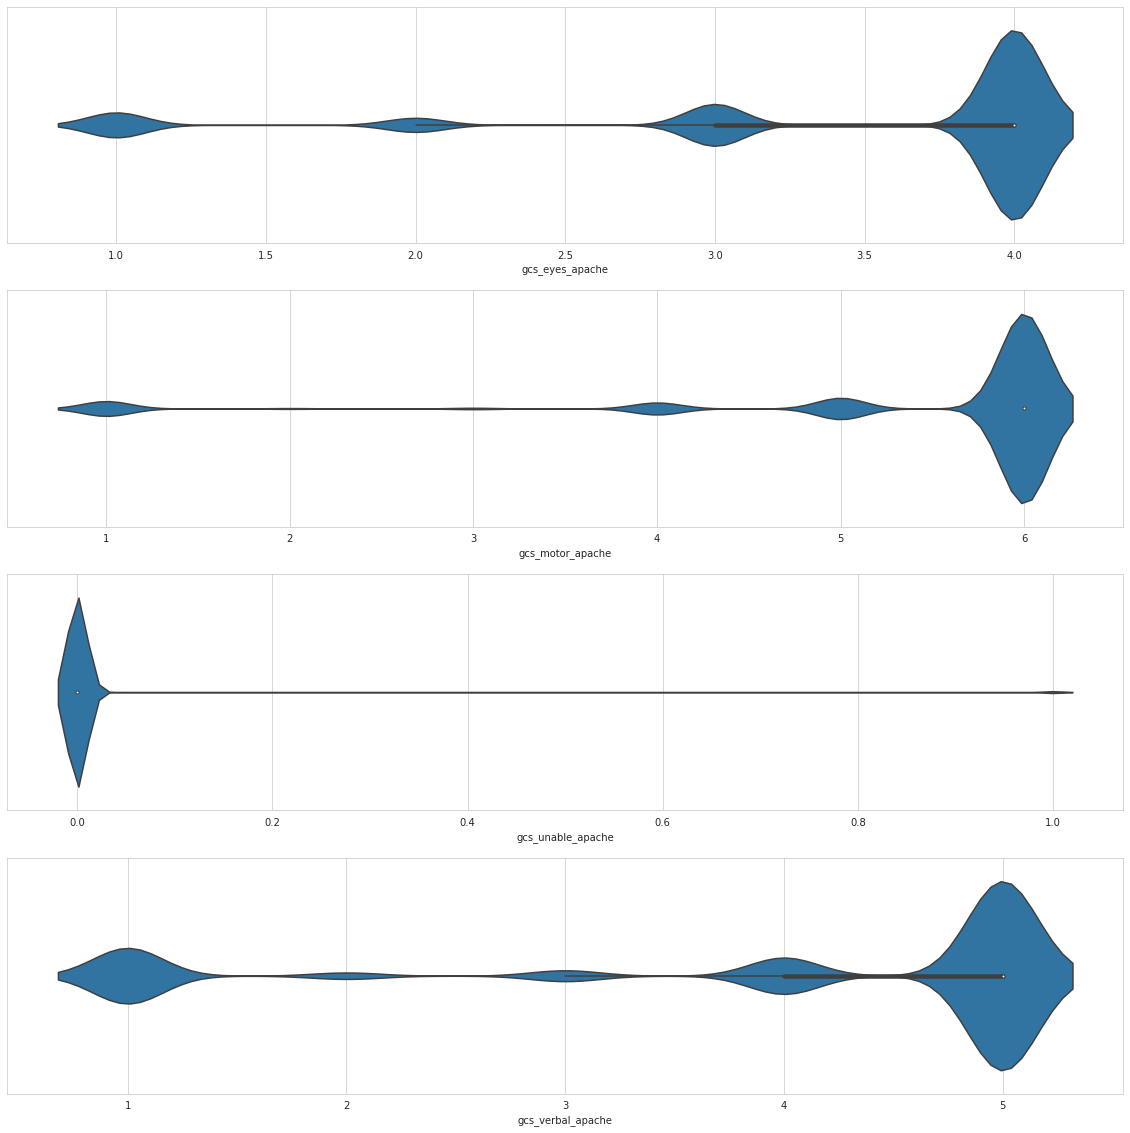

In [19]:
gcs=['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache']

#Countplot on above Columns
plt.figure(figsize=(20,20))
i=0
for col in gcs:
    plt.subplot(4,1,i+1)
    sns.set_style("whitegrid")
    sns.violinplot(data[col])
    i+=1
    
plt.show()  

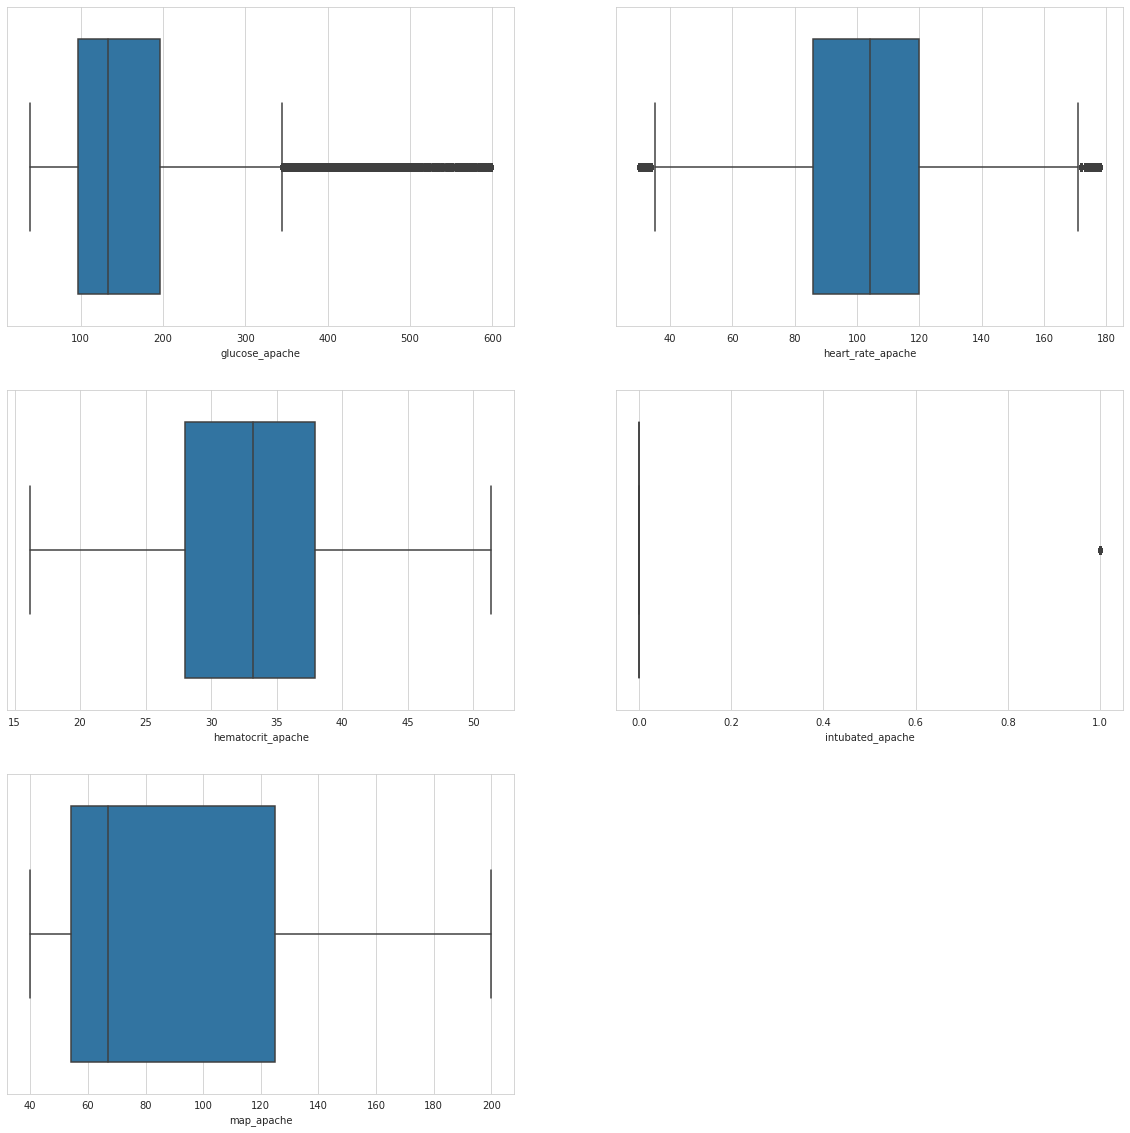

In [20]:
apach=['glucose_apache','heart_rate_apache','hematocrit_apache','intubated_apache','map_apache']

#Countplot on above Columns
plt.figure(figsize=(20,20))
i=0
for col in apach:
    plt.subplot(3,2,i+1)
    sns.set_style("whitegrid")
    sns.boxplot(data[col])
    i+=1
    
plt.show()  

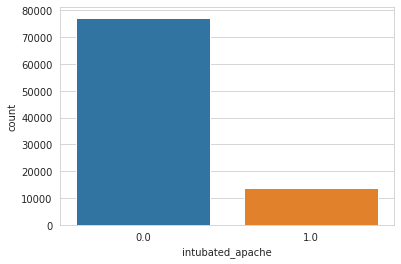

In [21]:
sns.set_style("whitegrid")
sns.countplot(data['intubated_apache'])
plt.show()  

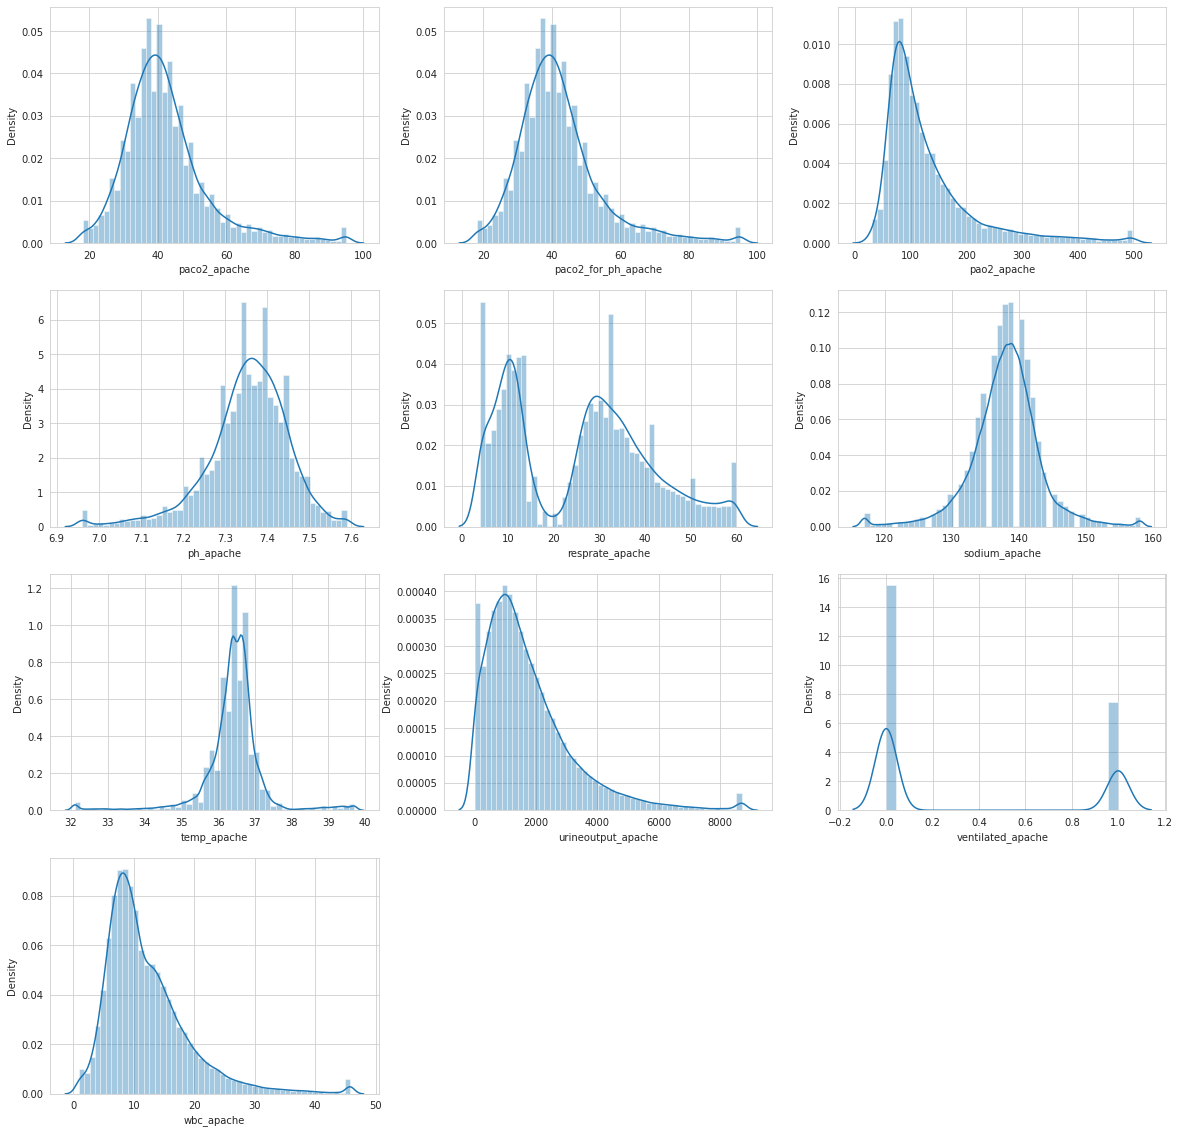

In [22]:
apa=['paco2_apache','paco2_for_ph_apache','pao2_apache','ph_apache','resprate_apache','sodium_apache','temp_apache','urineoutput_apache','ventilated_apache','wbc_apache']

#Countplot on above Columns
plt.figure(figsize=(20,20))
i=0
for col in apa:
    plt.subplot(4,3,i+1)
    sns.set_style("whitegrid")
    sns.distplot(data[col])
    i+=1
    
plt.show()  

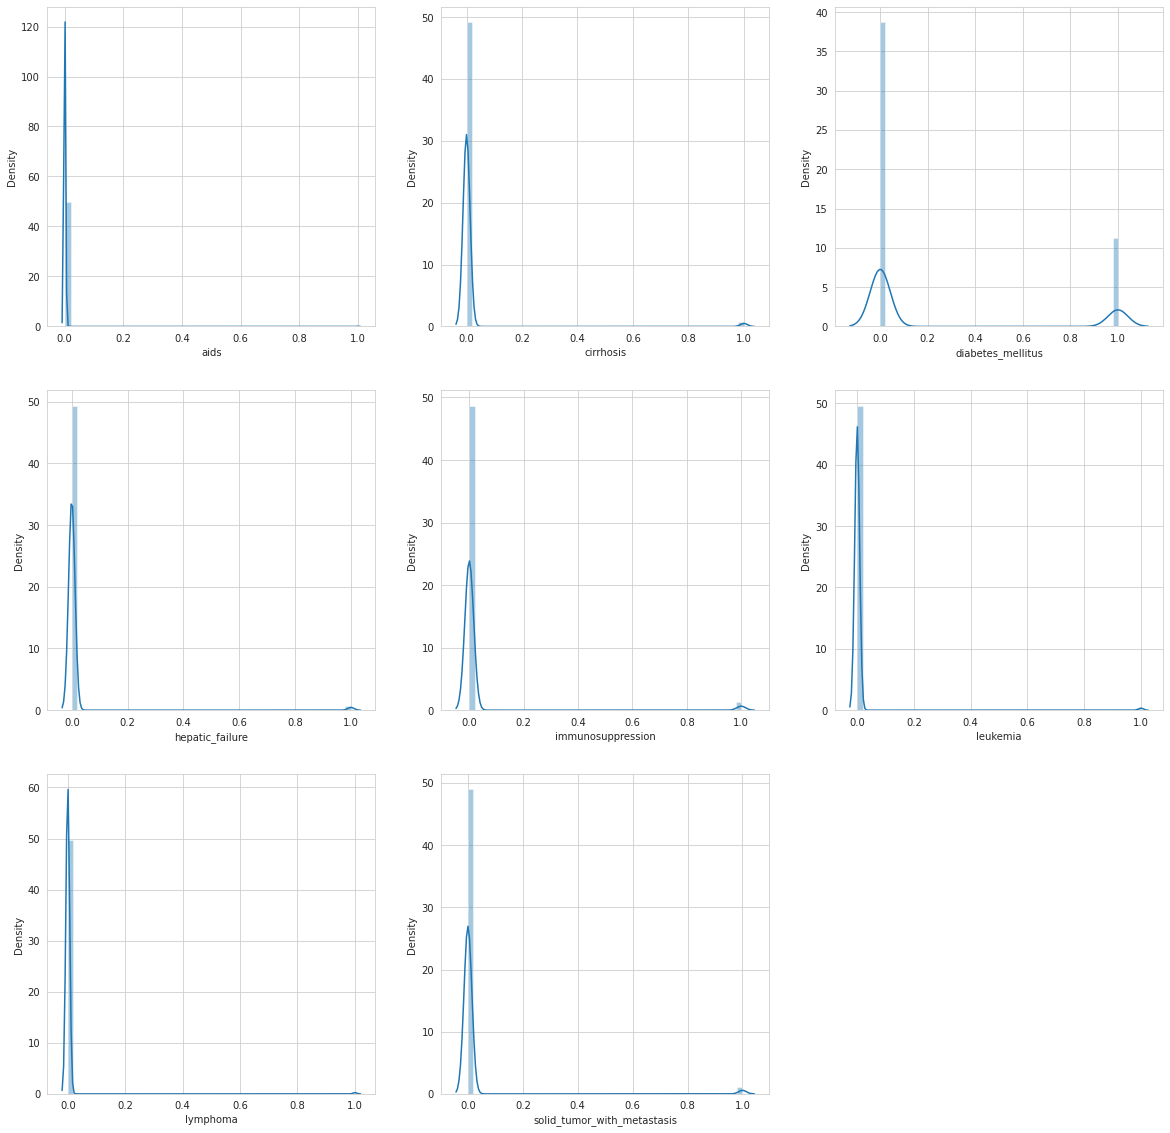

In [23]:
disease=['aids','cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis']

#Countplot on above Columns
plt.figure(figsize=(20,20))
i=0
for col in disease:
    plt.subplot(3,3,i+1)
    sns.set_style("whitegrid")
    sns.distplot(data[col])
    i+=1
    
plt.show()  

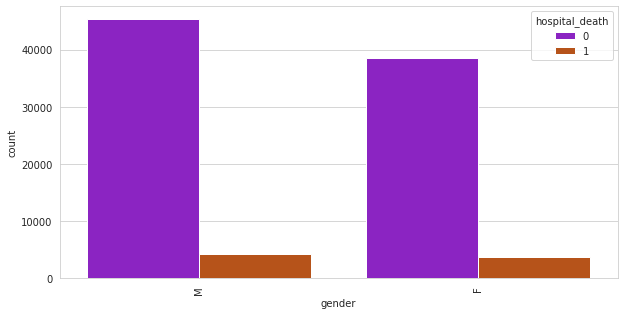

In [24]:
plt.figure(figsize = (10,5))
a=data.sort_values('gender',ascending=False)
sns.set_style("whitegrid")
sns.countplot(x = "gender", hue = "hospital_death", data = a, palette='gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [25]:
data.drop('icu_id',axis=1,inplace=True)

In [27]:
null=100*(data.isnull().sum()/data.shape[0])
null[null>0]

age                               4.610033
bmi                               3.738837
ethnicity                         1.521049
gender                            0.027259
height                            1.454538
hospital_admit_source            23.343474
icu_admit_source                  0.122120
weight                            2.965774
albumin_apache                   59.292576
apache_2_diagnosis                1.812175
apache_3j_diagnosis               1.200484
arf_apache                        0.779606
bilirubin_apache                 63.386870
bun_apache                       21.002475
creatinine_apache                20.556519
fio2_apache                      77.271488
gcs_eyes_apache                   2.072770
gcs_motor_apache                  2.072770
gcs_unable_apache                 1.130701
gcs_verbal_apache                 2.072770
glucose_apache                   12.033190
heart_rate_apache                 0.957334
hematocrit_apache                21.674136
intubated_a

In [28]:
pivot = pd.melt(data, data.describe().columns[0], data.describe().columns[1:])

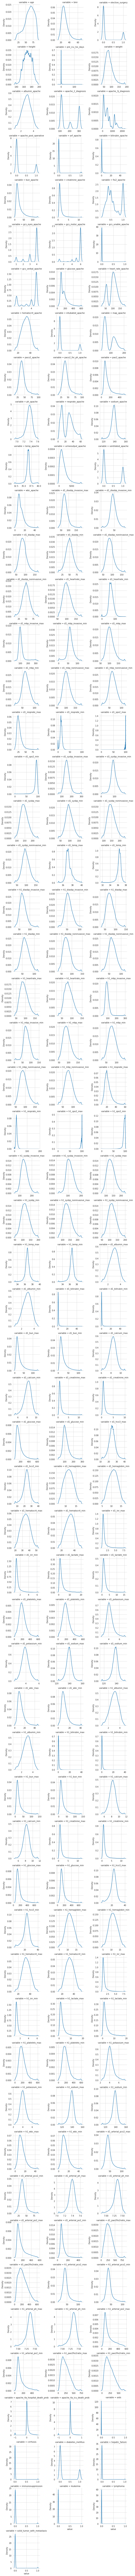

In [29]:
fig = sns.FacetGrid(pivot, col = 'variable', col_wrap = 3,
                    sharex = False, sharey = False)
fig.map(sns.kdeplot, "value")
plt.show()

In [31]:
data.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,admit,CTICU,0.541667,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,admit,Med-Surg ICU,0.927778,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,14

In [33]:
#drop columns with high null values
dull = ['d1_mbp_invasive_max','d1_mbp_invasive_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min','d1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min',
        'h1_diasbp_invasive_max','h1_diasbp_invasive_min','h1_mbp_invasive_max','h1_mbp_invasive_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max',
        'h1_calcium_min','h1_creatinine_max','h1_creatinine_min','h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max',
        'h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min','h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min',
        'h1_wbc_max','h1_wbc_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max','h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min',
        'd1_arterial_pco2_max','d1_arterial_pco2_min','d1_arterial_ph_max','d1_arterial_ph_min','d1_arterial_po2_max','d1_arterial_po2_min','d1_pao2fio2ratio_max','d1_pao2fio2ratio_min']
data = pd.DataFrame(data)
data.drop(dull,axis=1,inplace=True)

In [34]:
data.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,admit,CTICU,0.541667,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,admit,Med-Surg ICU,0.927778,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,NaN,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,NaN,NaN,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,NaN,NaN,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,NaN,NaN,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,admit,CTICU,0.000694,61.7,NaN,203.0,1206.03,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,NaN

In [35]:
100*(data.isnull().sum()/data.shape[0])

hospital_death                    0.000000
age                               4.610033
bmi                               3.738837
elective_surgery                  0.000000
ethnicity                         1.521049
gender                            0.027259
height                            1.454538
hospital_admit_source            23.343474
icu_admit_source                  0.122120
icu_stay_type                     0.000000
icu_type                          0.000000
pre_icu_los_days                  0.000000
weight                            2.965774
albumin_apache                   59.292576
apache_2_diagnosis                1.812175
apache_3j_diagnosis               1.200484
apache_post_operative             0.000000
arf_apache                        0.779606
bilirubin_apache                 63.386870
bun_apache                       21.002475
creatinine_apache                20.556519
fio2_apache                      77.271488
gcs_eyes_apache                   2.072770
gcs_motor_a

In [36]:
data.drop(data.columns[data.apply(lambda col: col.isnull().sum()/len(data) > 0.50)], axis=1,inplace=True)

In [37]:
data.dropna(axis=0,how='any',inplace=True)

In [38]:
data.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
5,0,67.0,27.560000,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,admit,Med-Surg ICU,0.000694,100.0,301.0,403.01,0,0.0,13.0,0.71,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,36.7,36.7,13.0,13.0,8.8,8.8,0.71,0.71,156.0,125.0,27.0,27.0,15.6,15.6,44.2,44.2,159.0,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
17,0,46.0,25.845717,0,Hispanic,M,167.6,Emergency Department,Accident & Emergency,admit,CTICU,0.000000,72.6,108.0,203.01,0,0.0,15.0,1.00,1.0,4.0,0.0,1.0,143.0,114.0,44.2,1.0,113.0,34.0,132.0,36.4,1.0,9.7,89.0,61.0,89.0,61.0,98.0,64.0,113.0,76.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,169.0,102.0,37.1,36.4,89.0,63.0,89.0,63.0,94.0,80.0,104.0,88.0,104.0,88.0,21.0,9.0,99.0,95.0,169.0,115.0,169.0,115.0,36.6,36.6,15.0,15.0,8.5,8.5,1.00,1.00,143.0,143.0,27.0,27.0,15.0,15.0,44.2,44.2,247.0,247.0,4.9,4.9,132.0,132.0,9.7,9.7,0.11,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2

In [39]:
data.isnull().sum()

hospital_death                   0
age                              0
bmi                              0
elective_surgery                 0
ethnicity                        0
gender                           0
height                           0
hospital_admit_source            0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
weight                           0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
bun_apache                       0
creatinine_apache                0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
glucose_apache                   0
heart_rate_apache                0
hematocrit_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache     

In [40]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[['ethnicity','gender','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type','apache_3j_bodysystem','apache_2_bodysystem']],drop_first=True)
# Adding the results to the master dataframe
data = pd.concat([data,dummy],axis=1)

data.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.

In [41]:
cols = ['ethnicity','gender','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type','apache_3j_bodysystem','apache_2_bodysystem']
data.drop(cols,axis=1,inplace=True)

In [42]:
data.shape

(27795, 151)

In [43]:
X = data.drop('hospital_death',axis=1)
y = data['hospital_death']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19456, 150)
(8339, 150)
(19456,)
(8339,)


In [46]:
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=150, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [50]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
1946/1946 [==============================] - 5s 2ms/step - loss: 0.8417 - accuracy: 0.8769
Epoch 2/150
1946/1946 [==============================] - 4s 2ms/step - loss: 0.3075 - accuracy: 0.9046
Epoch 3/150
1946/1946 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9085
Epoch 4/150
1946/1946 [==============================] - 4s 2ms/step - loss: 0.2642 - accuracy: 0.9113
Epoch 5/150
1946/1946 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9117
Epoch 6/150
1946/1946 [==============================] - 4s 2ms/step - loss: 0.2484 - accuracy: 0.9143
Epoch 7/150
1946/1946 [==============================] - 4s 2ms/step - loss: 0.2426 - accuracy: 0.9156
Epoch 8/150
1946/1946 [==============================] - 4s 2ms/step - loss: 0.2403 - accuracy: 0.9167
Epoch 9/150
1946/1946 [==============================] - 4s 2ms/step - loss: 0.2387 - accuracy: 0.9169
Epoch 10/150
1946/1946 [==============================] - 4s 2ms/step - l

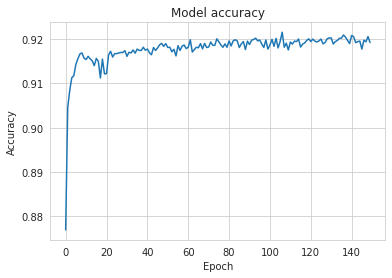

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


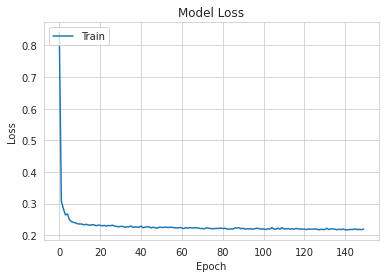

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [55]:
scores_test = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

261/261 [==============================] - 1s 2ms/step - loss: 0.2194 - accuracy: 0.9161

accuracy: 91.61%


In [56]:
#saving the model
model.save('keras_model.h5')

In [57]:
#loading the model 
from keras.models import load_model
model = load_model('keras_model.h5')